In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import random
import tensorflow.keras.utils as utils
import pydot
from tensorflow.keras import regularizers
from sklearn.ensemble import RandomForestRegressor

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_gpu_available()
!python --version

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17444899225027354846
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6593071867608912148
physical_device_desc: "device: XLA_CPU device"
]
2.3.1
Num GPUs Available:  0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
/bin/bash: python: command not found


In [3]:
dataset_dir = "./Datasets/energydata_complete.csv"

In [4]:
df = pd.read_csv(dataset_dir, index_col=0)
df = df.fillna(df.mean())
df.head(10)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702


array([[<AxesSubplot:title={'center':'Appliances'}>]], dtype=object)

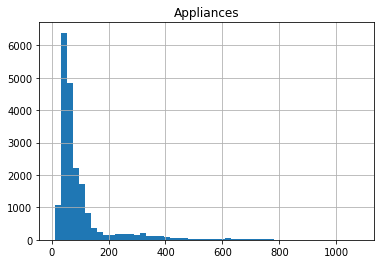

In [5]:
df.hist(column="Appliances", bins=50)

In [6]:
df.isnull().values.any()

False

In [7]:
df = df.sample(frac=1, random_state=41)

In [8]:
col_num = len(df.columns)
row_num = len(df.index)
print("Number of columns is: {} and number of rows is: {}".format(col_num, row_num))

Number of columns is: 28 and number of rows is: 19735


In [9]:
trainx = df.iloc[:int(0.8*row_num), 1:(col_num-2)]
trainy = df.iloc[:int(0.8*row_num), 0]

testx = df.iloc[int(0.8*row_num):, 1:(col_num-2)]
testy = df.iloc[int(0.8*row_num):, 0]

In [10]:
scaler = StandardScaler()
trainx_scaled = pd.DataFrame(scaler.fit_transform(trainx), columns = trainx.columns, index = trainx.index)
textx_scaled = pd.DataFrame(scaler.transform(testx), columns = testx.columns, index = testx.index)

In [11]:
group_A_train_x_op = trainx_scaled.iloc[:,[0,19,20,21,22,23,24]] 
group_B_train_x_op = trainx_scaled.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
group_C_train_x_op = trainx_scaled.iloc[:,[11,12,13,14,15,16,17,18]]

group_A_test_x_op = textx_scaled.iloc[:,[0,19,20,21,22,23,24]]
group_B_test_x_op = textx_scaled.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
group_C_test_x_op = textx_scaled.iloc[:,[11,12,13,14,15,16,17,18]]

In [12]:
size_inp_a = len(group_A_train_x_op.columns)
size_inp_b = len(group_B_train_x_op.columns)
size_inp_c = len(group_C_train_x_op.columns)

In [13]:
def get_MICS_model(inp_sizeA, inp_sizeB, inp_sizeC, use_encoders, drop_out, hidden_num = 4, hidden_size=32):
    inputs_A = keras.layers.Input(shape=(inp_sizeA), name="input_A")
    inputs_B = keras.layers.Input(shape=(inp_sizeB), name="input_B")
    inputs_C = keras.layers.Input(shape=(inp_sizeC), name="input_C")
    
    #If encoders are not to be used, inputs will be directly given to global model
    
    if use_encoders == True:
        encoder_A = get_encoder_model(inp_sizeA)
        encoder_B = get_encoder_model(inp_sizeB)
        encoder_C = get_encoder_model(inp_sizeC)
    
        global_inp_A = encoder_A(inputs_A)
        global_inp_B = encoder_B(inputs_B)
        global_inp_C = encoder_C(inputs_C)

        global_inp = keras.layers.concatenate([global_inp_A, global_inp_B, global_inp_C])
    else:
        global_inp = keras.layers.concatenate([inputs_A, inputs_A, inputs_A])
        
    h = keras.layers.Dense(hidden_size, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3))(global_inp)
    h = keras.layers.Dropout(drop_out)(h)
    for hidden in range(hidden_num):
        h = keras.layers.Dense(hidden_size, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3))(h)
        h = keras.layers.Dropout(drop_out)(h) 

    outputs = keras.layers.Dense(1, activation="relu")(h)    
    return keras.Model(inputs=[inputs_A, inputs_B, inputs_C], outputs = outputs)

def get_encoder_model(inp_size):
    inputs = keras.layers.Input(shape=(inp_size))
    h1 = keras.layers.Dense(10, activation="relu")(inputs)
    outputs = keras.layers.Dense(inp_size, activation="relu")(h1)
    return keras.Model(inputs,outputs)

In [ ]:
def get_MICS_model(inp_sizeA, inp_sizeB, inp_sizeC, use_encoders, drop_out, hidden_num = 4, hidden_size=32):
    inputs_A = keras.layers.Input(shape=(inp_sizeA), name="input_A")
    inputs_B = keras.layers.Input(shape=(inp_sizeB), name="input_B")
    inputs_C = keras.layers.Input(shape=(inp_sizeC), name="input_C")
    
    #If encoders are not to be used, inputs will be directly given to global model
    
    if use_encoders == True:
        encoder_A = get_encoder_model(inp_sizeA)
        encoder_B = get_encoder_model(inp_sizeB)
        encoder_C = get_encoder_model(inp_sizeC)
    
        global_inp_A = encoder_A(inputs_A)
        global_inp_B = encoder_B(inputs_B)
        global_inp_C = encoder_C(inputs_C)

        global_inp = keras.layers.concatenate([global_inp_A, global_inp_B, global_inp_C])
    else:
        global_inp = keras.layers.concatenate([inputs_A, inputs_A, inputs_A])
        
    RF = RandomForestClassifier()
    RF.fit(X_train, Y_train)
    
    return keras.Model(inputs=[inputs_A, inputs_B, inputs_C], outputs = outputs)

def get_encoder_model(inp_size):
    inputs = keras.layers.Input(shape=(inp_size))
    h1 = keras.layers.Dense(10, activation="relu")(inputs)
    outputs = keras.layers.Dense(inp_size, activation="relu")(h1)
    return keras.Model(inputs,outputs)

In [14]:
MICS_model = get_MICS_model(size_inp_a, size_inp_b, size_inp_c, use_encoders = True, drop_out = 0.25)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50), 
        keras.callbacks.ReduceLROnPlateau("val_loss", factor = 0.8, patience=30,
                                         verbose = 2, mode = "auto", 
                                          min_lr = 1e-6)]
MICS_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=keras.losses.MeanSquaredError())
history = MICS_model.fit(x = [group_A_train_x_op.values, group_B_train_x_op.values, group_C_train_x_op.values], y = trainy.values,  
                         validation_data = ([group_A_test_x_op.values, group_B_test_x_op.values, group_C_test_x_op.values], testy.values),
                         epochs=300, batch_size = 300, callbacks=callback)
training_val_loss = history.history["val_loss"]
best_row_index = np.argmin(training_val_loss)
best_val_loss = training_val_loss[best_row_index]
best_val_loss

Epoch 1/300
53/53 [==============================] - 0s 6ms/step - loss: 12784.1963 - val_loss: 8897.4795
Epoch 2/300
53/53 [==============================] - 0s 3ms/step - loss: 10252.8936 - val_loss: 8739.0176
Epoch 3/300
53/53 [==============================] - 0s 3ms/step - loss: 9818.7070 - val_loss: 8299.8105
Epoch 4/300
53/53 [==============================] - 0s 3ms/step - loss: 9489.5078 - val_loss: 8662.0889
Epoch 5/300
53/53 [==============================] - 0s 3ms/step - loss: 9272.0029 - val_loss: 7658.0195
Epoch 6/300
53/53 [==============================] - 0s 3ms/step - loss: 9002.4004 - val_loss: 8400.9980
Epoch 7/300
53/53 [==============================] - 0s 2ms/step - loss: 8817.4873 - val_loss: 7628.0586
Epoch 8/300
53/53 [==============================] - 0s 3ms/step - loss: 8592.9092 - val_loss: 8030.0542
Epoch 9/300
53/53 [==============================] - 0s 2ms/step - loss: 8589.8945 - val_loss: 7725.1157
Epoch 10/300
53/53 [==============================] -

KeyboardInterrupt: 

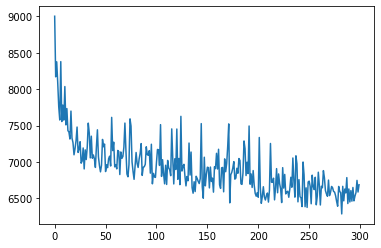

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history["val_loss"])

In [15]:
i = 0
classical_list = []
while i<5:
    MICS_model = get_MICS_model(size_inp_a, size_inp_b, size_inp_c, use_encoders = True, drop_out = 0.25)
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50), 
            keras.callbacks.ReduceLROnPlateau("val_loss", factor = 0.8, patience=30,
                                             verbose = 2, mode = "auto", 
                                              min_lr = 1e-6)]
    MICS_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=keras.losses.MeanSquaredError())
    history = MICS_model.fit(x = [group_A_train_x_op.values, group_B_train_x_op.values, group_C_train_x_op.values], y = trainy.values,  
                             validation_data = ([group_A_test_x_op.values, group_B_test_x_op.values, group_C_test_x_op.values], testy.values),
                             epochs=300, batch_size = 300, callbacks=callback)
    training_val_loss = history.history["val_loss"]
    best_row_index = np.argmin(training_val_loss)
    best_val_loss = training_val_loss[best_row_index]
    classical_list.append(best_val_loss)
    i = i + 1

Epoch 1/300
53/53 [==============================] - 0s 5ms/step - loss: 12740.8916 - val_loss: 9259.6953
Epoch 2/300
53/53 [==============================] - 0s 3ms/step - loss: 10274.4629 - val_loss: 8880.1045
Epoch 3/300
53/53 [==============================] - 0s 3ms/step - loss: 9621.7842 - val_loss: 8759.0527
Epoch 4/300
53/53 [==============================] - 0s 3ms/step - loss: 9217.8545 - val_loss: 7978.4395
Epoch 5/300
53/53 [==============================] - 0s 3ms/step - loss: 9114.3682 - val_loss: 7980.1650
Epoch 6/300
53/53 [==============================] - 0s 3ms/step - loss: 8834.1758 - val_loss: 7987.6099
Epoch 7/300
53/53 [==============================] - 0s 3ms/step - loss: 8685.9688 - val_loss: 7671.4712
Epoch 8/300
53/53 [==============================] - 0s 3ms/step - loss: 8736.8652 - val_loss: 7644.3784
Epoch 9/300
53/53 [==============================] - 0s 2ms/step - loss: 8503.8242 - val_loss: 7449.0688
Epoch 10/300
53/53 [==============================] -

In [16]:
classical_list

[6367.75634765625,
 6460.544921875,
 6311.841796875,
 6576.6884765625,
 6826.95849609375]

In [18]:
classical_avg = sum(classical_list)/len(classical_list)
classical_avg

6508.7580078125